In [14]:
from disqco.parti.FM.multilevel_FM import MLFM_recursive
from disqco.graphs.GCP_hypergraph import QuantumCircuitHyperGraph
from qiskit import transpile
from disqco.circuits.cp_fraction import cp_fraction
from disqco.parti.FM.FM_methods import set_initial_partitions

num_qubits = 48

num_partitions = 6

qpu_info = [int(num_qubits/num_partitions) + 1 for i in range(num_partitions)]

circuit = cp_fraction(num_qubits, num_qubits, 0.5)

circuit = transpile(circuit, basis_gates=['cp', 'u'])

graph = QuantumCircuitHyperGraph(circuit,group_gates=True)

initial_assignment = set_initial_partitions(qpu_info, num_qubits, circuit.depth(),num_partitions, reduced=True)

from disqco.parti.FM.FM_main import run_FM

final_cost, final_assignment, cost_list_1 = run_FM(
    graph,
    initial_assignment,
    qpu_info,
    num_partitions,
    limit=num_qubits*graph.depth/8,
    max_gain=4,
    passes=100,
    stochastic=True,
    active_nodes=graph.nodes,
    log = False,
    add_initial = False,
    costs = None
)

graph = QuantumCircuitHyperGraph(circuit,group_gates=True)

initial_assignment = set_initial_partitions(qpu_info, num_qubits, circuit.depth(),num_partitions, reduced=True)

final_cost, final_assignment, cost_list_2 = run_FM(
    graph,
    initial_assignment,
    qpu_info,
    num_partitions,
    limit=num_qubits*graph.depth/8,
    max_gain=4,
    passes=100,
    stochastic=False,
    active_nodes=graph.nodes,
    log = False,
    add_initial = False,
    costs = None
)

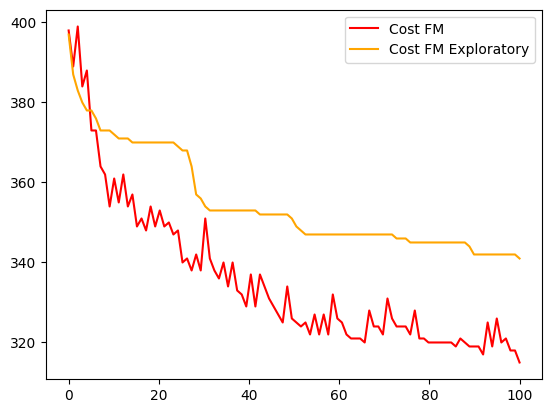

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, len(cost_list_1), len(cost_list_1))  # Create a list of numbers from 0 to 1 with 50 elements
# y1 =  time_list      # Data for left y-axis
y2 =  cost_list_1    # Data for right y-axis
y3 =  cost_list_2    # Data for right y-axis
# y4 =  time_list_2      # Data for left y-axis

fig, ax1 = plt.subplots()
# plt.plot(x, y1, color="blue", label="Runtime")
# plt.plot(x, y4, color="green", label="Runtime")

plt.plot(x, y2, color="red", label="Cost FM")
plt.plot(x, y3, color="orange", label="Cost FM Exploratory")

plt.legend()

